In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files

uploaded = files.upload()

Saving boston.csv to boston.csv


1. Загрузите данные из файла "boston.csv" о недвижимости в различных
районах Бостона.

In [2]:
df = pd.read_csv('boston.csv',
                 usecols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                          'B', 'LSTAT', 'MEDV'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


2. Проверьте, что у всех загруженных данных числовой тип.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


У всех численный тип

3. Проверьте, есть ли по каким-либо признакам отсутствующие данные.
Если отсутствующие данные есть – заполните их медианным
значением.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Отсутствующих данных нет

4. Посчитайте коэффициент корреляции для всех пар признаков.
Подсказка: воспользуйтесь методом corr() для датафрейма, чтобы
получить сразу всю корреляционную матрицу.

In [5]:
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


5. С помощью одной из библиотек визуализации постройте тепловую
карту (heatmap) по корреляционной матрице.

<Axes: >

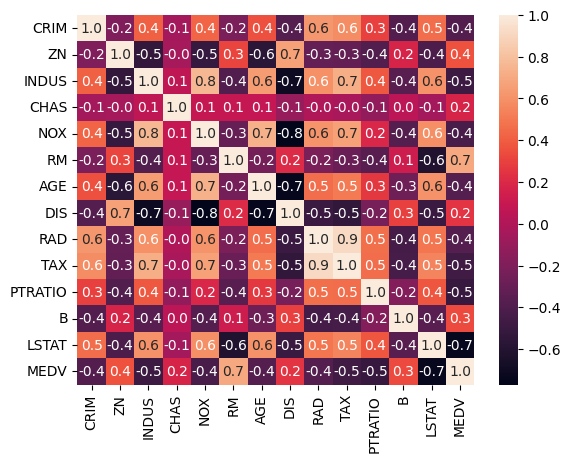

In [6]:
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")

6. Выберите от 4 до 6 признаков, наиболее подходящих для анализа (на свое
усмотрение, выбор обоснуйте), которые в наибольшей степени
коррелируют с целевым признаком (ценой недвижимости).

LSTAT: процент населения с низким социальным статусом, имеет корреляцию -0,7, у такого жилья скорее всего будет наблюдаться низкая стоимость

RM: среднее количество комнат в доме, имеет корреляцию 0,7 - количество комнат напрямую влияет на стоимость жилья

INDUS: количество промышленных зон в районе, имеет достаточно корреляцию -0,5 , жилье в промышленных районах обычно дешевле

TAX: налоги, имеет корреляцию -0,5 , скорее всего, покупатели не хотели бы платить большие налоги, так что это скажется на стоимости

7. Для каждого из выбранных признаков в паре с целевым признаком
постройте точечную диаграмму (диаграмму рассеяния).

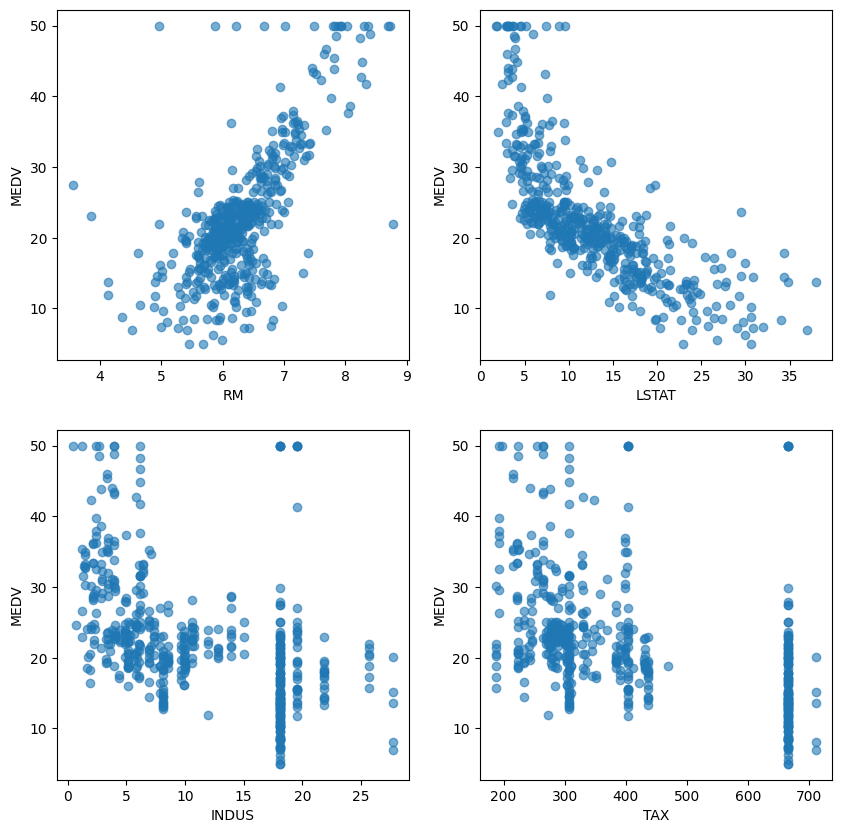

In [12]:
features = ['RM', 'LSTAT', 'INDUS', 'TAX']

n = len(features)
rows = (n + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.ravel()

for ax, feature in zip(axes, features):
    ax.scatter(df[feature], df['MEDV'], alpha=0.6)
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')

for ax in axes[len(features):]:
    ax.set_visible(False)


8. Визуально убедитесь, что связь между выбранным признаком и целевым
прослеживается. Если на основе графика считаете, что зависимости
нет – исключите этот признак из дальнейшего рассмотрения (но при
этом как минимум 3 признака должно остаться в любом случае, если не
получается выбрать три признака, вернитесь к шагу 6).

Выбираем признаки RM, LSTAT и INDUS, визуально связь прослеживается

9. Сформируйте список факторных признаков и целевую переменную.

In [14]:
X = df[['RM', 'LSTAT', 'INDUS']]
y = df['MEDV']

10. Выполните разбиение датасета на обучающую и тестовую выборки в
соотношении 8:2. При формировании обучающей и тестовой выборок
строки из исходного датафрейма должны выбираться в случайном
порядке. Подсказка: можно воспользоваться функцией train_test_split из
библиотеки sklearn.model_selection.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=15)

11. Из набора линейных моделей библиотеки sklearn возьмите линейную
регрессию, обучите ее на обучающем наборе.

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

12. Получите векторы прогнозных значений целевой переменной на
обучающей и на тестовой выборках.

In [17]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

13. Посчитайте коэффициент детерминации
(R2)
и корень из
среднеквадратичной ошибки (RMSE) на обучающей и на тестовой
выборках. проанализируйте полученные данные. Если данные не
удовлетворительные, вернитесь к шагу

In [19]:
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
print(f"R2 обучающей выборки: {R2_train:.3f}")
print(f"R2 тестовой выборки: {R2_test:.3f}")

R2 обучающей выборки: 0.636
R2 тестовой выборки: 0.642


In [20]:
RMSE_train = mean_squared_error(y_train, y_train_pred)**0.5
RMSE_test = mean_squared_error(y_test, y_test_pred)**0.5
print(f"RMSE обучающей выборки: {RMSE_train:.3f}")
print(f"RMSE тестовой выборки: {RMSE_test:.3f}")

RMSE обучающей выборки: 5.591
RMSE тестовой выборки: 5.262


Исходя из полученных данных - модель работает удовлетворительно

14. Постройте boxplot («ящик с усами») для целевого признака
(MEDV). Определите, по диаграмме какие значения можно считать
выбросами.

Text(0, 0.5, 'MEDV')

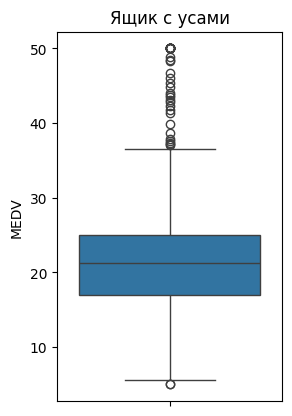

In [21]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['MEDV'])
plt.title('Ящик с усами')
plt.ylabel('MEDV')

15. Отфильтруйте исходные данные, удалив выбросы. Пересоздайте
тестовую и обучающую выборки, переобучите модель. Посчитайте
показатели R2 и RMSE. Как они изменились? О чем это говорит?

In [26]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]
X_filtered = df_filtered[['RM', 'LSTAT', 'INDUS']]
y_filtered = df_filtered['MEDV']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=15
)

linear_model_filtered = LinearRegression()
linear_model_filtered.fit(X_train_filtered, y_train_filtered)
y_pred_train_filtered = linear_model_filtered.predict(X_train_filtered)
y_pred_test_filtered = linear_model_filtered.predict(X_test_filtered)
R2_train_filtered = r2_score(y_train_filtered, y_pred_train_filtered)
R2_test_filtered = r2_score(y_test_filtered, y_pred_test_filtered)
RMSE_train_filtered = (mean_squared_error(y_train_filtered, y_pred_train_filtered))**0.5
RMSE_test_filtered = (mean_squared_error(y_test_filtered, y_pred_test_filtered))**0.5


print("До удаления")
print(f"R2 обучающей выборки: {R2_train:.2f}")
print(f"R2 тестовой выборки: {R2_test:.2f}")
print(f"RMSE обучающей выборки: {RMSE_train:.2f}")
print(f"RMSE тестовой выборки: {RMSE_test:.2f}")

print("\nПосле удаления")
print(f"R2 обучающей выборки: {R2_train_filtered:.2f}")
print(f"R2 тестовой выборки: {R2_test_filtered:.2f}")
print(f"RMSE обучающей выборки: {RMSE_train_filtered:.2f}")
print(f"RMSE тестовой выборки: {RMSE_test_filtered:.2f}")


До удаления
R2 обучающей выборки: 0.64
R2 тестовой выборки: 0.64
RMSE обучающей выборки: 5.59
RMSE тестовой выборки: 5.26

После удаления
R2 обучающей выборки: 0.65
R2 тестовой выборки: 0.63
RMSE обучающей выборки: 3.78
RMSE тестовой выборки: 4.05


Модель не стала лучше предсказывать, но уменьшилась RMSE, выбросы не имели сильное влияние на модель

16. Из набора линейных моделей библиотеки sklearn возьмите
гребневую регрессию (Ridge). Обучите модель. Посчитайте показатели
R2 и RMSE. проанализируйте

In [28]:
ridge_model = Ridge(alpha=1.0, random_state=15)
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

R2_train_ridge = r2_score(y_train, y_pred_train_ridge)
R2_test_ridge = r2_score(y_test, y_pred_test_ridge)
RMSE_train_ridge = (mean_squared_error(y_train, y_pred_train_ridge))**0.5
RMSE_test_ridge = (mean_squared_error(y_test, y_pred_test_ridge))**0.5

print("Линейная регрессия: ")
print(f"R2 обучающей выборки: {R2_train:.3f}")
print(f"R2 тестовой выборки: {R2_test:.3f}")
print(f"RMSE обучающей выборки: {RMSE_train:.3f}")
print(f"RMSE тестовой выборки: {RMSE_test:.3f}")

print("\nГребневая регрессия")
print(f"R2 обучающей выборки: {R2_train_ridge:.3f}")
print(f"R2 тестовой выборки:  {R2_test_ridge:.3f}")
print(f"RMSE обучающей выборки: {RMSE_train_ridge:.3f}")
print(f"RMSE тестовой выборки:  {RMSE_test_ridge:.3f}")

Линейная регрессия: 
R2 обучающей выборки: 0.636
R2 тестовой выборки: 0.642
RMSE обучающей выборки: 5.591
RMSE тестовой выборки: 5.262

Гребневая регрессия
R2 обучающей выборки: 0.636
R2 тестовой выборки:  0.642
RMSE обучающей выборки: 5.591
RMSE тестовой выборки:  5.263


Показатели не изменились, скорее всего, это означает, что в нашем случае мультиколлинеарность не была проблемой

17. Постройте полиномиальную регрессию с использованием
полинома 3й степени. Посчитайте показатели R2 и RMSE. Сравните все
полученные результаты. Сделайте вывод.

In [29]:
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('linear', LinearRegression())
])

polynomial_model.fit(X_train, y_train)
y_pred_train_polynomial = polynomial_model.predict(X_train)
y_pred_test_polynomial = polynomial_model.predict(X_test)
R2_train_polynomial = r2_score(y_train, y_pred_train_polynomial)
R2_test_polynomial = r2_score(y_test, y_pred_test_polynomial)
RMSE_train_polynomial = (mean_squared_error(y_train, y_pred_train_polynomial))**0.5
RMSE_test_polynomial = (mean_squared_error(y_test, y_pred_test_polynomial))**0.5

print("Линейная регрессия: ")
print(f"R2 обучающей выборки: {R2_train:.3f}")
print(f"R2 тестовой выборки: {R2_test:.3f}")
print(f"RMSE обучающей выборки: {RMSE_train:.3f}")
print(f"RMSE тестовой выборки: {RMSE_test:.3f}")

print("\nПолиномиальная регрессия: ")
print(f"R2 обучающей выборки: {R2_train_polynomial:.3f}")
print(f"R2 тестовой выборки:  {R2_test_polynomial:.3f}")
print(f"RMSE обучающей выборки: {RMSE_train_polynomial:.3f}")
print(f"RMSE тестовой выборки:  {RMSE_test_polynomial:.3f}")

Линейная регрессия: 
R2 обучающей выборки: 0.636
R2 тестовой выборки: 0.642
RMSE обучающей выборки: 5.591
RMSE тестовой выборки: 5.262

Полиномиальная регрессия: 
R2 обучающей выборки: 0.842
R2 тестовой выборки:  0.757
RMSE обучающей выборки: 3.683
RMSE тестовой выборки:  4.337


Показатели изменились в лучшую сторону, значит, лучше использовать для прогнозирования цен на недвижимость - полиномиальную модель